___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [1]:
!python --version

Python 3.9.13


In [1]:
#!pip install tensorflow

#!conda install tensorflow

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - tensorflow -> python[version='2.7.*|3.7.*|3.6.*|3.5.*']

Your python: python=3.9

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
cha

In [ ]:
import tensorflow as tf
tf.__version__

# Keras Syntax Basics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
# pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
# pd.set_option('display.max_columns', None)

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [2]:
df = pd.read_csv("fake_reg.csv")


## Exploratory Data Analysis and Visualization

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.0,498.673029,93.785431,223.346793,433.025732,502.382117,564.921588,774.407854
feature1,1000.0,1000.014171,0.974018,997.058347,999.332068,1000.009915,1000.637580,1003.207934
feature2,1000.0,999.979847,0.948330,996.995651,999.316106,1000.002243,1000.645380,1002.666308


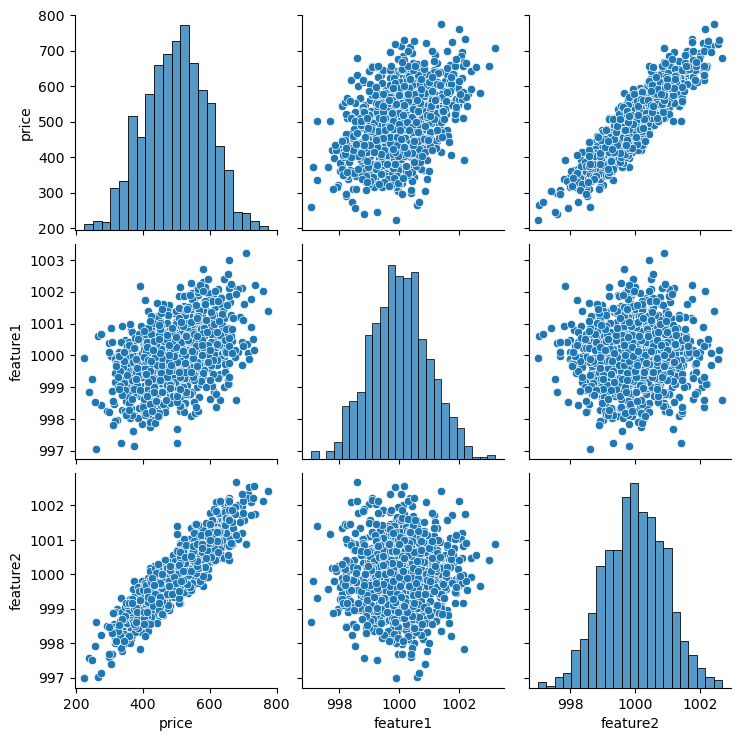

In [11]:
sns.pairplot(df);

In [6]:
df.corr()

,price,feature1,feature2
price,1.000000,0.444190,0.907576
feature1,0.444190,1.000000,0.030607
feature2,0.907576,0.030607,1.000000


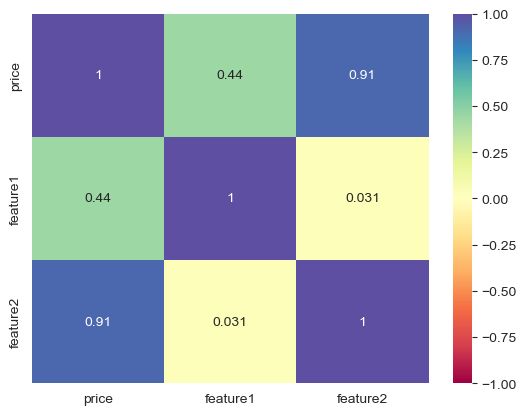

In [7]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral')
plt.show()

## Preprocessing of Data
- Train | Test Split, Scalling

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# X = df[['feature1', 'feature2']].values
# y = df['price'].values

In [18]:
X = df.drop('price', axis=1)
y = df['price']

In [19]:
X

,feature1,feature2
0,999.787558,999.766096
1,998.861615,1001.042403
2,1000.070267,998.844015
3,999.952251,1000.440940
4,1000.446011,1000.338531
...,...,...
995,1000.018988,999.672732
996,998.855379,1000.020026
997,1001.451646,998.847606
998,1000.771023,998.562851


In [20]:
y

0      461.527929
1      548.130011
2      410.297162
3      540.382220
4      546.024553
          ...    
995    476.526078
996    457.313186
997    456.720992
998    403.315576
999    599.367093
Name: price, Length: 1000, dtype: float64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [22]:
X_train.shape

(700, 2)

In [23]:
X_test.shape

(300, 2)

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [27]:
import tensorflow as tf

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Activation

In [29]:
X_train.shape

(700, 2)

In [30]:
# First way to create model

model = Sequential([Input(shape = X_train.shape[1]),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

2022-09-14 23:18:44.259080: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
# Second way to create model (recommended)

model = Sequential()
#model.add(Input(shape = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.79375887,  0.8829224 , -0.23999763, -0.8640096 ],
        [ 0.7571981 , -0.24625683,  0.57942605,  0.89474916]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.08255613,  0.5231032 ,  0.80517286, -0.3005768 ],
        [ 0.5987964 ,  0.04244703,  0.32029074,  0.44519073],
        [ 0.2942987 ,  0.41889387,  0.17633587, -0.25674015],
        [ 0.41964787, -0.10501456,  0.45965153,  0.61793166]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.00775588, -0.5457189 ,  0.50599724, -0.05053246],
        [-0.7541178 , -0.70115405, -0.3401094 , -0.8445281 ],
        [-0.39336693, -0.01740265,  0.2894

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [34]:
model.compile(optimizer = "rmsprop", loss = "mse")

In [35]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 256437.7812
Epoch 2/250
22/22 [==============================] - 0s 945us/step - loss: 256208.0469
Epoch 3/250
22/22 [==============================] - 0s 938us/step - loss: 255944.4531
Epoch 4/250
22/22 [==============================] - 0s 950us/step - loss: 255638.3125
Epoch 5/250
22/22 [==============================] - 0s 942us/step - loss: 255283.1094
Epoch 6/250
22/22 [==============================] - 0s 801us/step - loss: 254875.8125
Epoch 7/250
22/22 [==============================] - 0s 978us/step - loss: 254413.7656
Epoch 8/250
22/22 [==============================] - 0s 980us/step - loss: 253895.2656
Epoch 9/250
22/22 [==============================] - 0s 844us/step - loss: 253320.2500
Epoch 10/250
22/22 [==============================] - 0s 858us/step - loss: 252679.6562
Epoch 11/250
22/22 [==============================] - 0s 906us/step - loss: 251970.2188
Epoch 12/250
22/22 [=======================

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[2.242972 , 2.3216634, 1.197247 , 0.5832625],
        [3.3943624, 2.3803308, 3.2039857, 3.529429 ]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([0.6799356 , 0.66994303, 0.6673785 , 0.67721784], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[1.860872 , 1.892767 , 2.5627933, 1.4979798],
        [2.1871278, 1.1615882, 1.8909906, 2.0518177],
        [2.1024435, 1.8858083, 1.9566119, 1.5674849],
        [2.321373 , 1.527154 , 2.2966723, 2.5345213]], dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([0.64890456, 0.28246891, 0.628652  , 0.6691632 ], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.00775588, -0.5457189 ,  2.2289877 , -0.2782988 ],
        [-0.7541178 , -0.70115405,  1.394708  , -1.0604795 ],
        [-0.39336693, -0.01740265,  2.01

In [38]:
model.history.history

{'loss': [256437.78125,
  256208.046875,
  255944.453125,
  255638.3125,
  255283.109375,
  254875.8125,
  254413.765625,
  253895.265625,
  253320.25,
  252679.65625,
  251970.21875,
  251187.203125,
  250331.59375,
  249390.234375,
  248359.453125,
  247237.4375,
  246010.015625,
  244673.234375,
  243219.59375,
  241641.515625,
  239937.046875,
  238106.71875,
  236128.734375,
  233994.859375,
  231732.796875,
  229317.328125,
  226733.71875,
  223981.8125,
  221062.375,
  217969.765625,
  214695.796875,
  211224.921875,
  207585.34375,
  203763.421875,
  199745.078125,
  195542.484375,
  191122.65625,
  186542.3125,
  181766.78125,
  176788.546875,
  171625.421875,
  166313.1875,
  160740.921875,
  155025.46875,
  149160.078125,
  143113.703125,
  136926.359375,
  130608.5,
  124138.3203125,
  117589.4296875,
  110923.1875,
  104154.90625,
  97375.734375,
  90567.2578125,
  83714.4609375,
  76864.5234375,
  70066.1015625,
  63371.4296875,
  56776.3125,
  50327.49609375,
  44082.058

In [39]:
pd.DataFrame(model.history.history)

,loss
0,256437.781250
1,256208.046875
2,255944.453125
3,255638.312500
4,255283.109375
...,...
245,24.554062
246,24.321356
247,24.593853
248,24.038687


<AxesSubplot:>

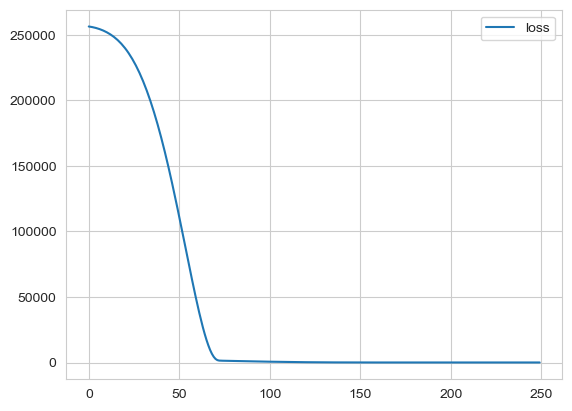

In [42]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 3000.0)

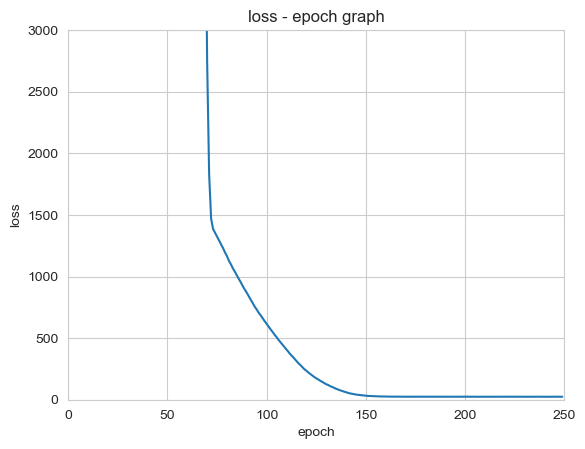

In [43]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

## Model Performance

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [45]:
model.evaluate(X_train, y_train, verbose=0)

24.55682945251465

In [46]:
model.evaluate(X_test, y_test, verbose=0)

26.80281639099121

In [47]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 927us/step


In [52]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
557,396.049985,405.668915
740,582.455066,593.588074
158,377.570426,373.155273
49,514.881741,512.566101
362,443.397036,445.713989
227,449.458484,450.500366
823,649.440068,642.547424
210,562.057936,567.986694
543,521.796992,517.827087
30,482.556412,492.275024


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

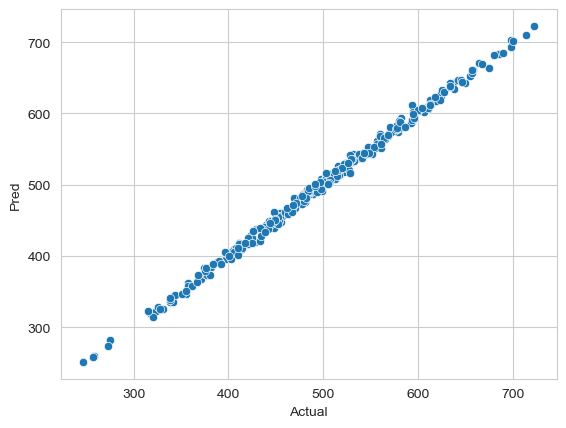

In [53]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [54]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [55]:
eval_metric(y_test, y_pred)

r2_score: 0.9969514648184226 
mae: 4.1979802964256985 
mse: 26.8028178495533 
rmse: 5.177143792628644


## Final Model and Model Deployment

### Final Model Training

In [ ]:
scaler = MinMaxScaler().fit(X)

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [ ]:
X_scaled = scaler.transform(X)

In [ ]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[1]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 257439.7969
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 257405.5156
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 257373.6250
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 257341.7344
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 257309.8906
Epoch 6/250
32/32 [==============================] - 0s 858us/step - loss: 257277.9844
Epoch 7/250
32/32 [==============================] - 0s 828us/step - loss: 257246.0156
Epoch 8/250
32/32 [==============================] - 0s 782us/step - loss: 257214.1562
Epoch 9/250
32/32 [==============================] - 0s 725us/step - loss: 257182.3438
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 257150.4531
Epoch 11/250
32/32 [==============================] - 0s 1ms/step - loss: 257118.5625
Epoch 12/250
32/32 [==============================] - 0

### Saving a Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

The key difference between HDF5 and SavedModel is that HDF5 uses object configs to save the model architecture, while SavedModel saves the execution graph. Thus, SavedModels are able to save custom objects like subclassed models and custom layers without requiring the original code.

In [ ]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

In [ ]:
#final_model.save("model_fake_reg") 

### Loading Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_fake_reg = load_model('model_fake_reg.h5')

In [ ]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

## Prediction-1

In [ ]:
sample = [[998, 1000]]

In [ ]:
sample_scaled = scaler_fake_reg.transform(sample)

In [ ]:
model_fake_reg.predict(sample_scaled)

array([[8.004098]], dtype=float32)

## Prediction-2

In [ ]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [ ]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [ ]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [ ]:
model_fake_reg.predict(sample_scaled)

array([[8.004098],
       [8.004098],
       [8.004098],
       [8.004098],
       [8.004098]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___